In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import make_scorer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import statsmodels.api as sm



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)


In [50]:
# read in the dataframe

df = pd.read_csv("Life_Expectancy_No_Missing_Vals.csv").set_index('Unnamed: 0')

## Is Status something we want in our model?

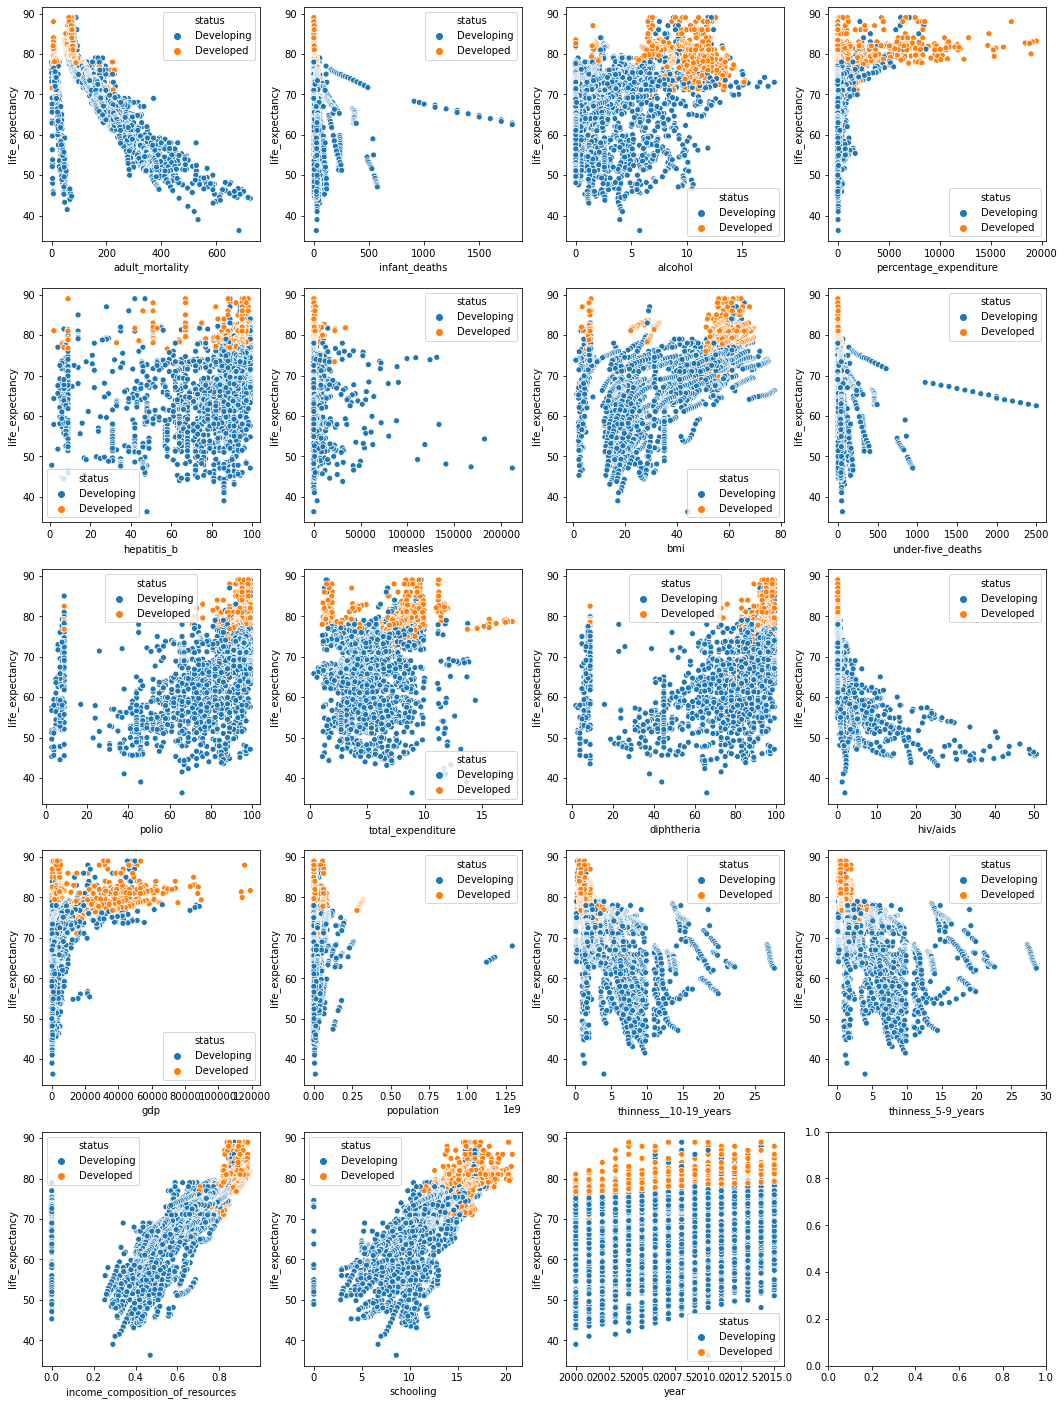

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,25))

for i, col in enumerate(cont):
    sns.scatterplot(x=df[col], y=df['life_expectancy'], hue=df['status'], ax=axes[i//4][i%4])
    #print(i//4, i%4)

#### From the above graph, we will make the following decisions for our model:

- We will not include status as a predictor. It seems all developed countries have a life expectancy of above 75. 
- We want to see how variables that can actually *be changed by a government to increase their countries health* affect life expectancy
- By this same logic, we will not include country or year in our model either

In [51]:
# Now, lets get a df of all our features

features = df[['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
 'hepatitis_b', 'measles','bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
 'hiv/aids', 'gdp', 'population', 'thinness__10-19_years', 'thinness_5-9_years', 'income_composition_of_resources',
 'schooling']]

## First Model - Nothing Fancy

Our first model to get a baseline idea will simply put our predictor variables against our target variable. Note we will apply a standard scaler to all our models so we are working in a standard scale.

In [52]:
X1 = features.copy()
y1 = df.life_expectancy

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X1.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X1.columns)

In [55]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.9239270219484093


In [56]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 3.7873334744343414
Training:  3.9239270219484093 vs. Testing:  3.7873334744343414


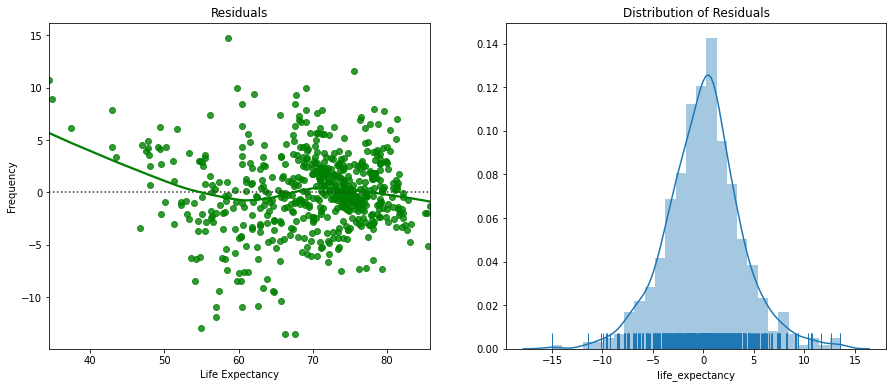

In [58]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()



In [57]:
X1 = sm.add_constant(X1)
model = sm.OLS(y1,X1)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     804.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:35:29   Log-Likelihood:                -8135.3
No. Observations:                2928   AIC:                         1.631e+04
Df Residuals:                    2909   BIC:                         1.642e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.2775      0.532    100.116      0.000      52.234      54.321
adult_mortality                    -0.0180      0.001    -23.269      0.000      -0.020      -0.016
infant_deaths                       0.0960      0.008     11.793      0.000       0.080       0.112
alcohol                             0.0533      0.023      2.283      0.023       0.008       0.099
percentage_expenditure              0.0002   6.73e-05      2.448      0.014    3.28e-05       0.000
hepatitis_b                        -0.0027      0.004     -0.720      0.471      -0.010       0.005
measles                         -1.346e-05   7.38e-06     -1.825      0.068   -2.79e-05       1e-06
bmi                                 0.0379      0.005      7.889      0.000       0.028       0.047
under-five_deaths                  -0.0714      0.006    -11.954      0.000      -0.083      -0.060
polio                               0.0269      0.004      6.217      0.000       0.018       0.035
total_expenditure                   0.0159      0.032      0.493      0.622      -0.047       0.079
diphtheria                          0.0306      0.005      6.611      0.000       0.022       0.040
hiv/aids                           -0.4767      0.017    -28.136      0.000      -0.510      -0.443
gdp                              3.941e-05   1.02e-05      3.858      0.000    1.94e-05    5.94e-05
population                      -1.184e-09   1.49e-09     -0.792      0.428   -4.11e-09    1.75e-09
thinness__10-19_years              -0.0746      0.049     -1.535      0.125      -0.170       0.021
thinness_5-9_years                  0.0007      0.048      0.014      0.989      -0.093       0.095
income_composition_of_resources     6.2401      0.617     10.116      0.000       5.031       7.450
schooling                           0.7983      0.042     19.102      0.000       0.716       0.880
==============================================================================
Omnibus:                      149.064   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.999
Skew:                          -0.051   Prob(JB):                    1.01e-119
Kurtosis:                       5.117   Cond. No.                     5.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Second Model - Tweak the first, remove large p-values

This model won't be too different, we want to see what happens when we remove statistically insignificant features. We determines which to remove based on any feature that had a p-value < .05 from our last OLS summary

In [71]:
features.columns

Index(['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population',
       'thinness__10-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [72]:
X2 = features[['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'bmi', 'under-five_deaths', 'polio',
       'diphtheria', 'hiv/aids', 'gdp', 
       'income_composition_of_resources', 'schooling']].copy()
y2 = df.life_expectancy

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [74]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X2.columns)

In [75]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3.9398861308295645


In [76]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 3.767605127175878
Training:  3.9398861308295645 vs. Testing:  3.767605127175878


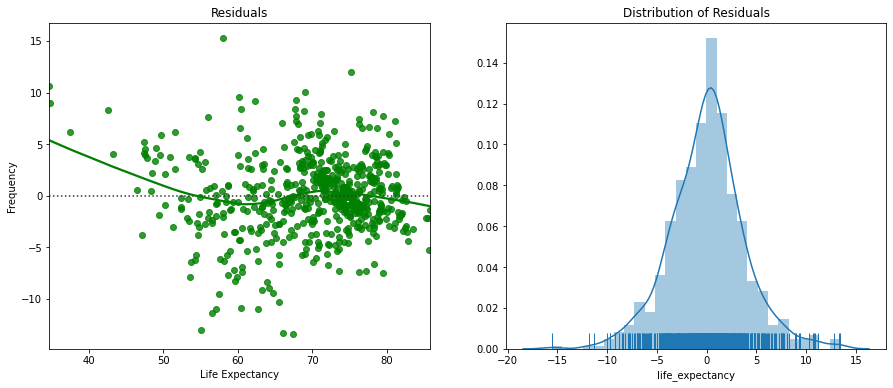

In [77]:
fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(121)
sns.residplot(y_test_pred, y_test, lowess=True, color="g", ax=ax1)
ax1.set_title("Residuals")
ax1.set_xlabel("Life Expectancy")

ax2 = plt.subplot(122)
sns.distplot((y_test_pred- y_test), kde=True, rug=True, ax=ax2)
ax2.set_title("Distribution of Residuals")
ax1.set_ylabel("Frequency")
plt.show()

In [78]:
X2 = sm.add_constant(X1)
model = sm.OLS(y2,X2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     804.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        16:37:38   Log-Likelihood:                -8135.3
No. Observations:                2928   AIC:                         1.631e+04
Df Residuals:                    2909   BIC:                         1.642e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.2775      0.532    100.116      0.000      52.234      54.321
adult_mortality                    -0.0180      0.001    -23.269      0.000      -0.020      -0.016
infant_deaths                       0.0960      0.008     11.793      0.000       0.080       0.112
alcohol                             0.0533      0.023      2.283      0.023       0.008       0.099
percentage_expenditure              0.0002   6.73e-05      2.448      0.014    3.28e-05       0.000
hepatitis_b                        -0.0027      0.004     -0.720      0.471      -0.010       0.005
measles                         -1.346e-05   7.38e-06     -1.825      0.068   -2.79e-05       1e-06
bmi                                 0.0379      0.005      7.889      0.000       0.028       0.047
under-five_deaths                  -0.0714      0.006    -11.954      0.000      -0.083      -0.060
polio                               0.0269      0.004      6.217      0.000       0.018       0.035
total_expenditure                   0.0159      0.032      0.493      0.622      -0.047       0.079
diphtheria                          0.0306      0.005      6.611      0.000       0.022       0.040
hiv/aids                           -0.4767      0.017    -28.136      0.000      -0.510      -0.443
gdp                              3.941e-05   1.02e-05      3.858      0.000    1.94e-05    5.94e-05
population                      -1.184e-09   1.49e-09     -0.792      0.428   -4.11e-09    1.75e-09
thinness__10-19_years              -0.0746      0.049     -1.535      0.125      -0.170       0.021
thinness_5-9_years                  0.0007      0.048      0.014      0.989      -0.093       0.095
income_composition_of_resources     6.2401      0.617     10.116      0.000       5.031       7.450
schooling                           0.7983      0.042     19.102      0.000       0.716       0.880
==============================================================================
Omnibus:                      149.064   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.999
Skew:                          -0.051   Prob(JB):                    1.01e-119
Kurtosis:                       5.117   Cond. No.                     5.34e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Third Model - Poly 2 degree by removing columns with VIF



## Fourth Model - Poly 2 degree by selecting best features (f-test, SelectKBest library)


## Fifth Model - Poly 2 degree by removing columns with Recursive Feature Elimination
